Sistema de Suporte ao Diagnóstico Médico com Machine Learning

Descrição do Projeto:

Este projeto é a primeira etapa de desenvolvimento de um sistema inteligente de suporte ao diagnóstico médico, voltado para auxiliar profissionais de saúde na triagem e análise inicial de exames médicos.  
A proposta é aplicar fundamentos de Inteligência Artificial, Aprendizado de Máquina e Visão Computacional, focando, nesta fase, na construção de um modelo preditivo com base em dados estruturados de exames clínicos.

Objetivo:

Construir um pipeline de Machine Learning capaz de:

- Processar dados médicos estruturados;
- Identificar padrões relevantes para o diagnóstico de doenças (ex: câncer de mama);
- Comparar diferentes algoritmos de classificação;
- Avaliar o desempenho e indicar o modelo mais adequado para uso clínico.

Etapas da Análise:

1. Importação das bibliotecas e do dataset;
2. Análise exploratória e visualização dos dados;
3. Preparação e normalização das variáveis;
4. Treinamento e avaliação de múltiplos modelos de machine learning;
5. Geração de métricas e curvas ROC;
6. Conclusões e próximos passos.

Obs.: O dataset utilizado nesta fase é o conjunto de dados de câncer de mama da Scikit-learn. Ele representa uma simulação inicial e será expandido futuramente para incluir imagens médicas e documentos clínicos, conforme previsto no desafio.

ETAPA 1 - Importação das bibliotecas

In [165]:
import pandas as pd # Manipular dados
import matplotlib.pyplot as plt # Construir gráficos
import seaborn as sns # Construir o mapa de calor

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_breast_cancer # Carregar o dataset de câncer de mama
from sklearn.model_selection import train_test_split # Dividir o dataset em treino e teste
from sklearn.preprocessing import StandardScaler # Normalizar os dados
from sklearn.linear_model import LogisticRegression # Modelo de classificação básico
from sklearn.ensemble import RandomForestClassifier # Modelo de classificação avançado (Random Forest)
from sklearn.svm import SVC # Modelo de classificação avançado (SVM)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc # Métricas de avaliação
from sklearn.model_selection import cross_val_score # Validação cruzada
from sklearn.decomposition import PCA # Redução de dimensionalidade (PCA)

In [166]:
# Carregar o dataset de câncer de mama
dados = load_breast_cancer()
print(type(dados))
print(dados.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


ETAPA 2 - Carregar dataset e adicionar a coluna diagnostico

In [167]:
df = pd.DataFrame(dados.data, columns=dados.feature_names)
df['diagnostico'] = dados.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [168]:
# Confirmar o tamanho do DataFrame
df.shape

(569, 31)

In [169]:
# Verificar valores nulos
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnostico                0
dtype: int64

ETAPA 3 - Exploração e visualização dos dados

Nesta seção, realizamos uma análise exploratória dos dados com foco em:

- Distribuição das classes (diagnóstico benigno ou maligno);
- Correlação entre as variáveis;
- Identificação de padrões visuais que auxiliam na tomada de decisão clínica.

In [170]:
# Estatísticas descritivas das features (X)
print(df.describe())


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      


Distribuição das classes:
diagnostico
1    357
0    212
Name: count, dtype: int64


array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

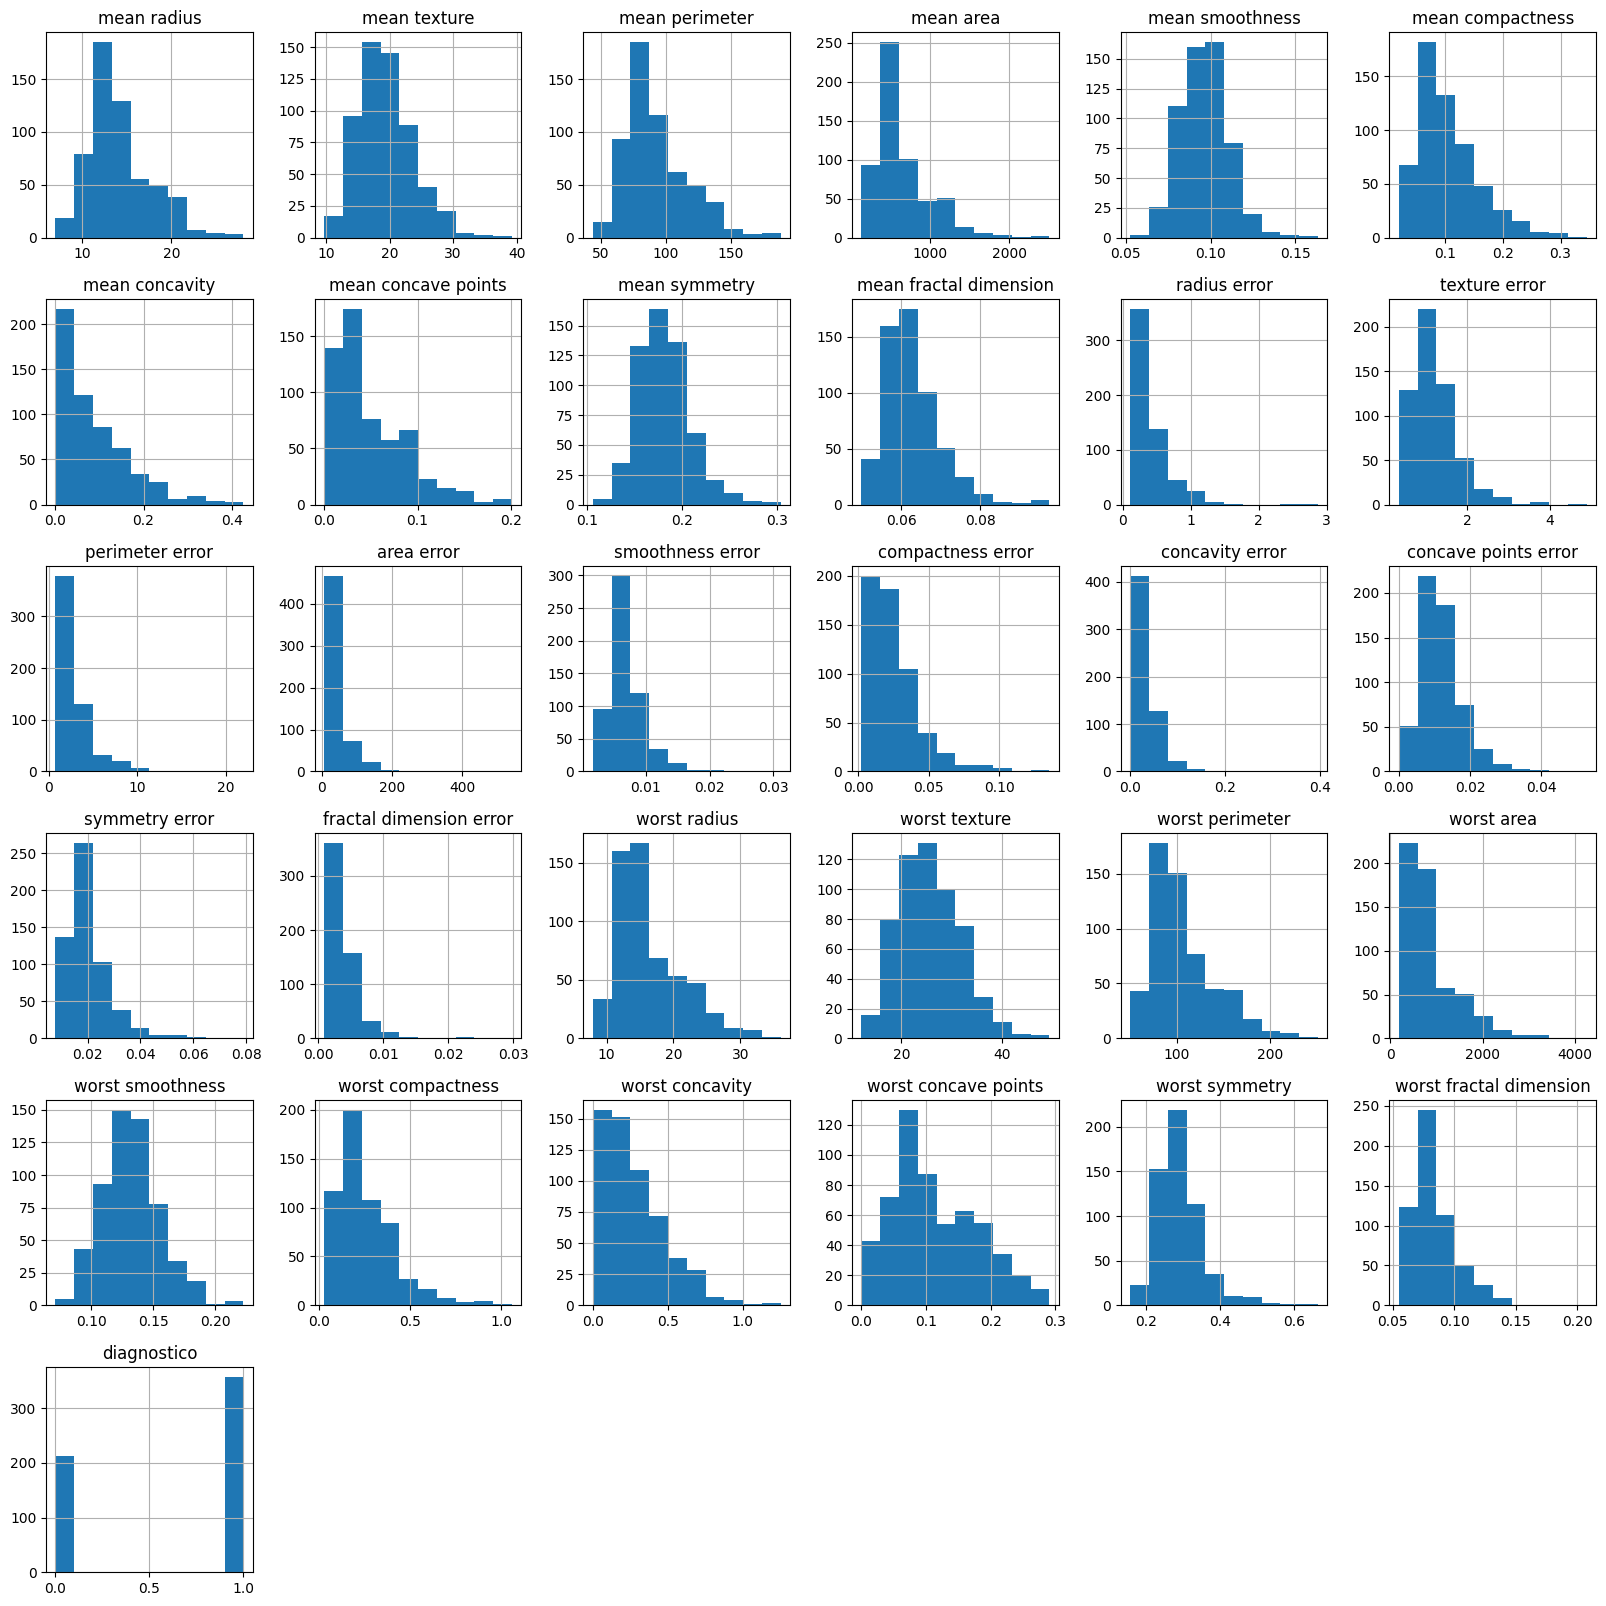

In [171]:
# Contagem de exames benignos (1) e malignos (0)
print("\nDistribuição das classes:")
print(df.value_counts('diagnostico'))

# Visualização da distribuição das features
df.hist(figsize=(20, 20))

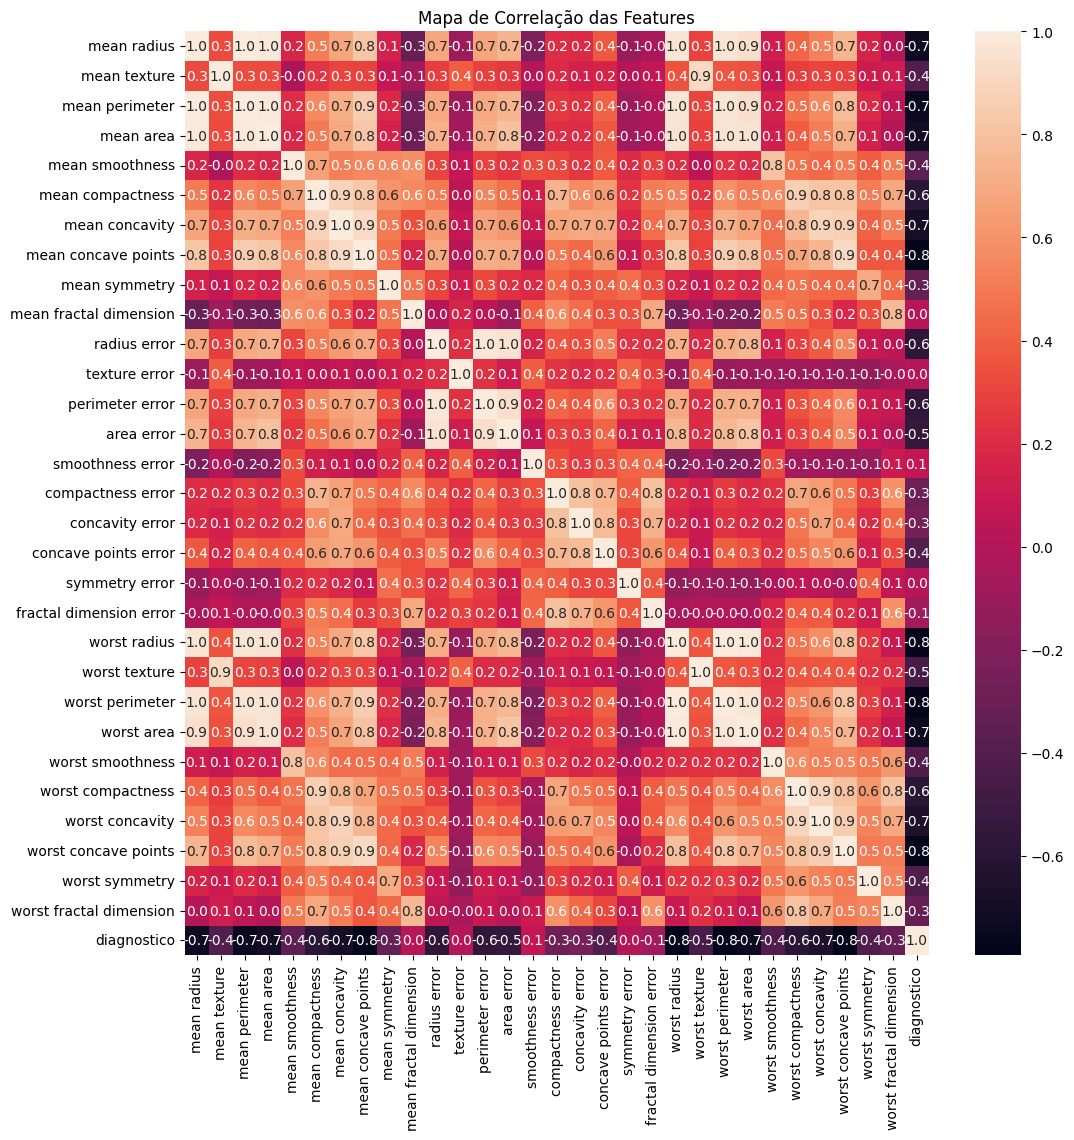

In [172]:
# Mapa de correlação para entender como as variáveis se relacionam
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt=".1f")
plt.title("Mapa de Correlação das Features")
plt.show()

In [173]:
# Correlação das features com o diagnóstico
correlacao_com_diagnostico = df.corr()['diagnostico'].sort_values()
print(correlacao_com_diagnostico)

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [174]:

# Selecionar as 10 features mais correlacionadas com o diagnóstico
X = df.drop('diagnostico', axis=1)
y = df['diagnostico']

seletor = SelectKBest(score_func=f_classif, k=10)
X_novo = seletor.fit_transform(X, y)

# Ver quais colunas foram selecionadas
colunas_escolhidas = X.columns[seletor.get_support()]
print(colunas_escolhidas)


Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


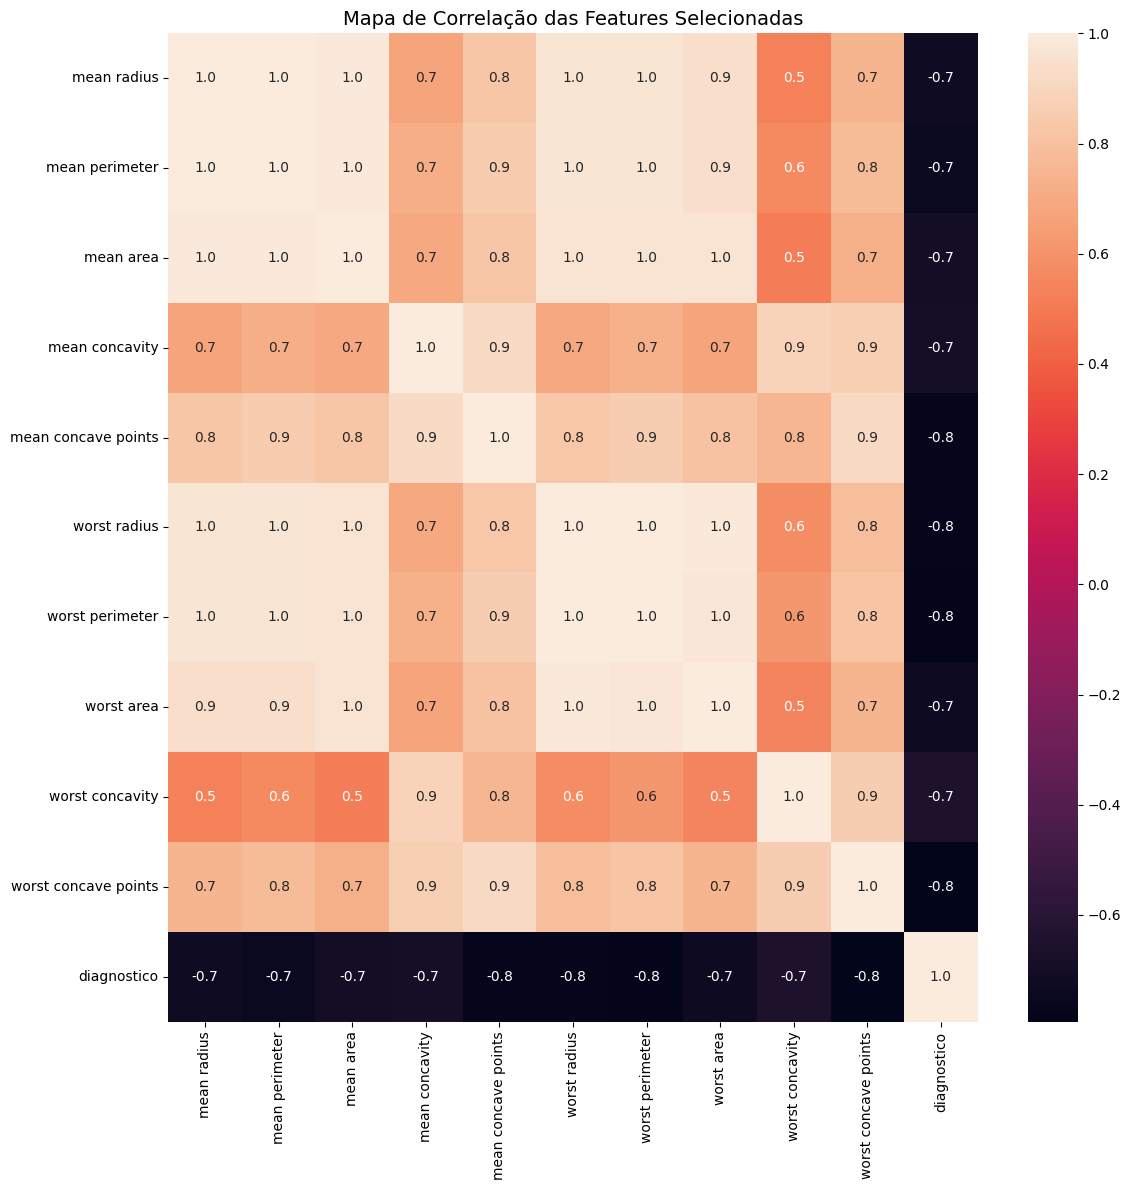

In [175]:
# Seleciona as colunas
colunas = ['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points', 'diagnostico']
corr = df[colunas].corr()

# Cria o heatmap com estilo semelhante ao anterior
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt=".1f")
plt.title("Mapa de Correlação das Features Selecionadas", fontsize=14)
plt.tight_layout()
plt.show()

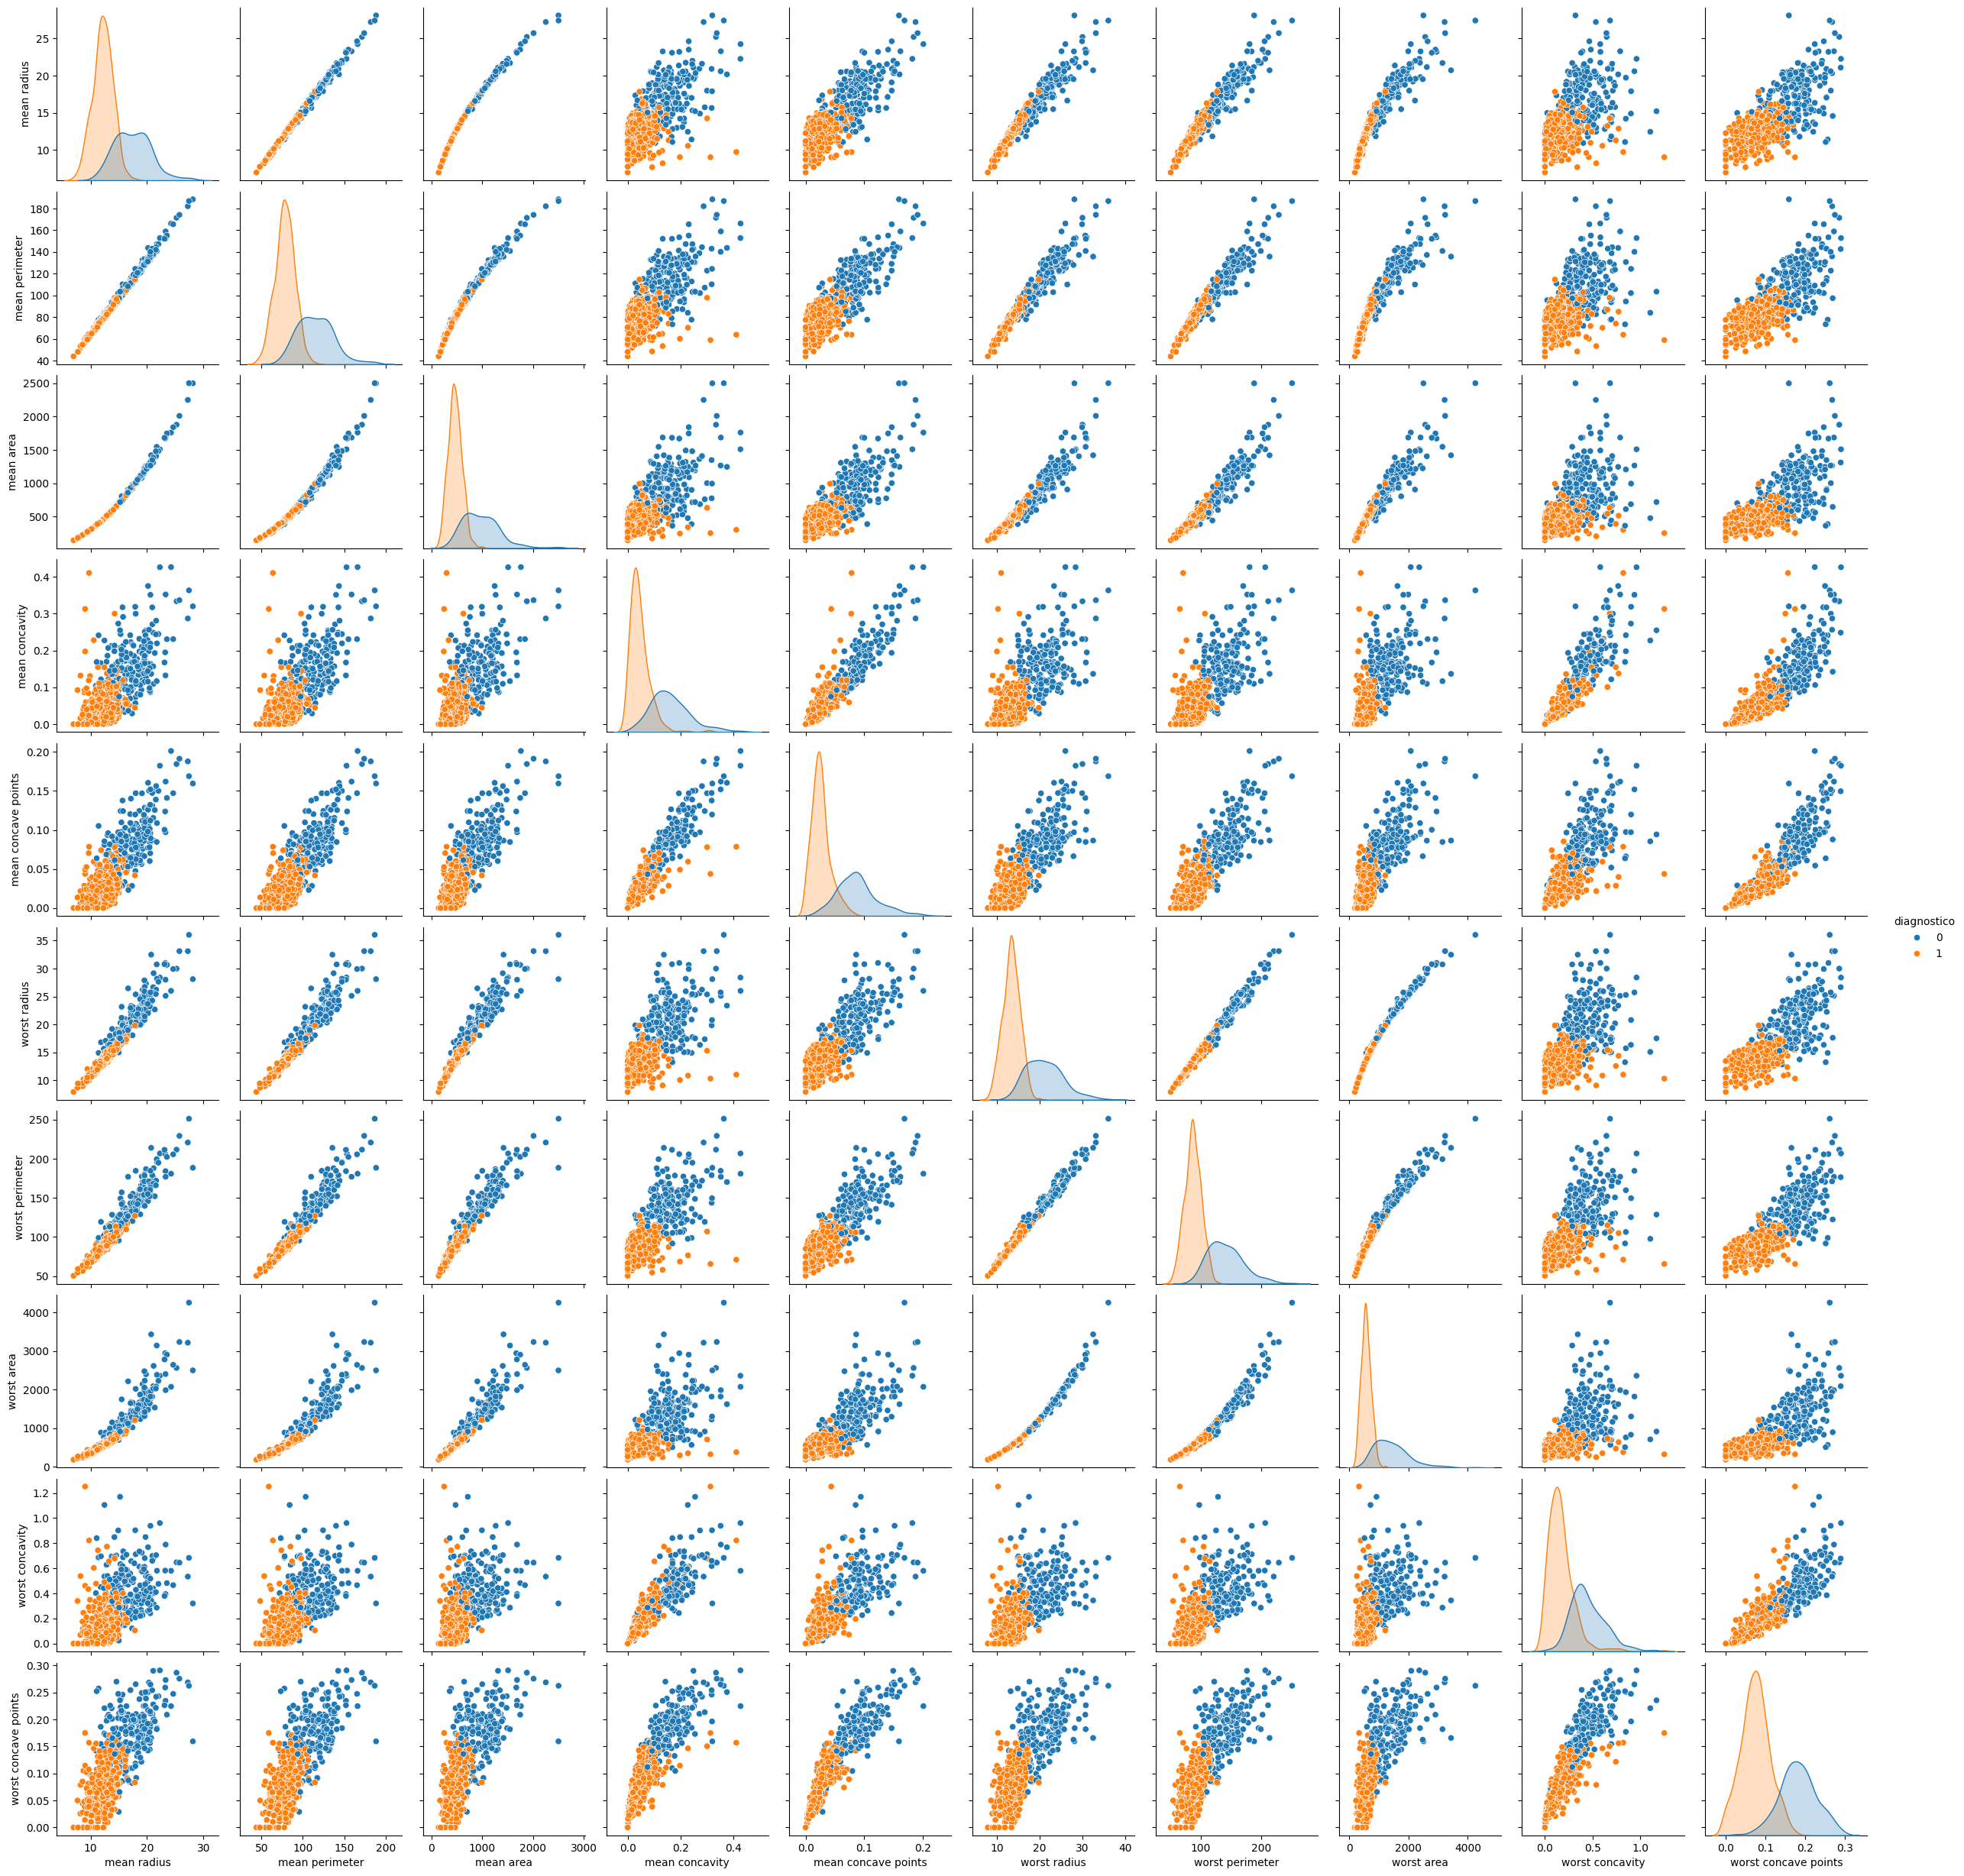

In [176]:
# Pairplot para visualizar a relação entre algumas features e o diagnóstico
sns.pairplot(df[['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points', 'diagnostico']], hue='diagnostico')
plt.show()

ETAPA 4 - Pré-Processamento

In [177]:
# Separar features (X) e alvo (y) a partir do df
X = df.drop(columns=['diagnostico'])
y = df['diagnostico']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25, stratify=y)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

# Padronizar os dados (StandardScaler)
scaler = StandardScaler()

# Ajustar o scaler apenas no treino e aplicar nos dois
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Dados foram padronizados!")

Tamanho do conjunto de treino: (398, 30)
Tamanho do conjunto de teste: (171, 30)

 Dados foram padronizados!


ETAPA 5 - Modelagem

In [178]:
# Modelo 1 - Regressão Logística
model_log = LogisticRegression(max_iter=1000)  # max_iter maior para garantir que vai convergir
model_log.fit(X_train_scaled, y_train)

# Modelo 2 - Random Forest
model_rf = RandomForestClassifier(n_estimators=200, random_state=25)
model_rf.fit(X_train_scaled, y_train)

# Modelo 3 - SVC
model_svc = SVC(kernel='linear', probability=True, random_state=25)
model_svc.fit(X_train_scaled, y_train)


print("Modelos treinados com sucesso!")

Modelos treinados com sucesso!


ETAPA 6 - Avaliação dos Modelos

Regressão Logística
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

SVC
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97   

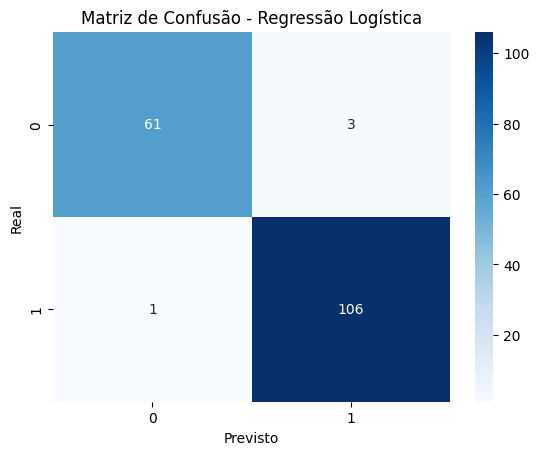

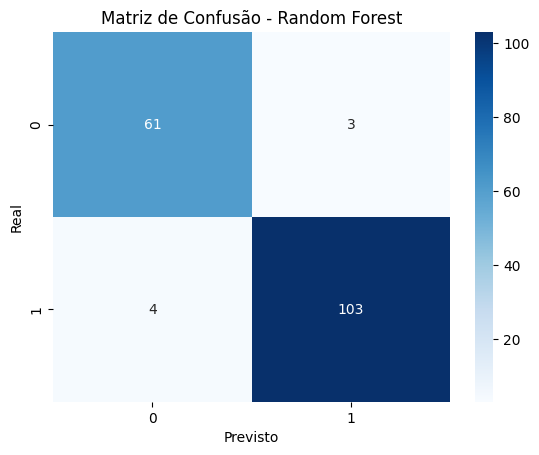

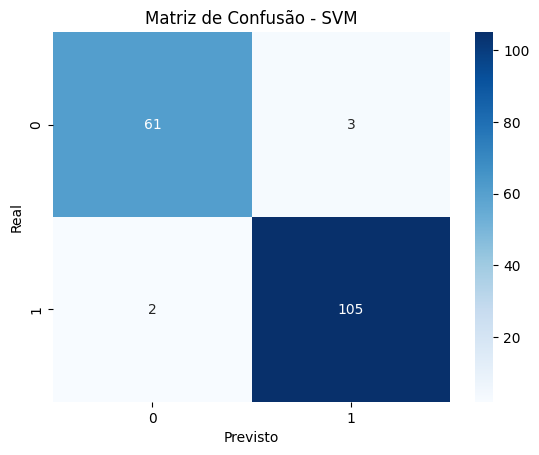

In [179]:
# Fazer previsões com os três modelos
prev_1 = model_log.predict(X_test_scaled)
prev_2 = model_rf.predict(X_test_scaled)
prev_3 = model_svc.predict(X_test_scaled)

# Avaliar Regressão Logística
print("Regressão Logística")
print(classification_report(y_test, prev_1))

# Avaliar Random Forest
print("Random Forest")
print(classification_report(y_test, prev_2))

# Avaliar SVC
print("SVC")
print(classification_report(y_test, prev_3))

# Matriz de Confusão para o Regressão Logística
cm = confusion_matrix(y_test, prev_1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Matriz de Confusão para o Random Forest (melhor modelo geralmente)
cm = confusion_matrix(y_test, prev_2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Matriz de Confusão para o SVM
cm = confusion_matrix(y_test, prev_3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

ETAPA 7 - Redução de Dimensionalidade com PCA

PCA aplicado!
Número de componentes principais escolhidos: 10
Regressão Logística com PCA
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
           1       0.97      1.00      0.99       107

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Random Forest com PCA
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.94      0.93      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

SVM com PCA
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   m

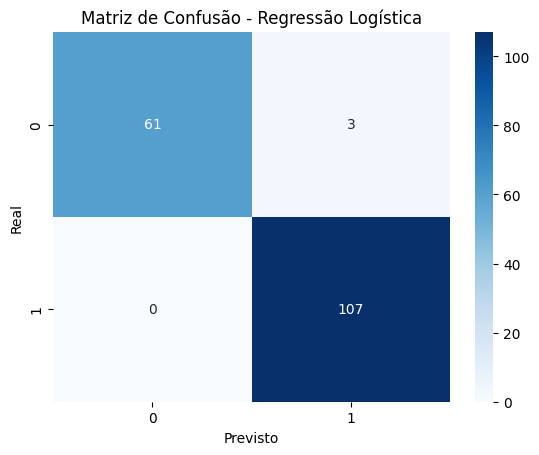

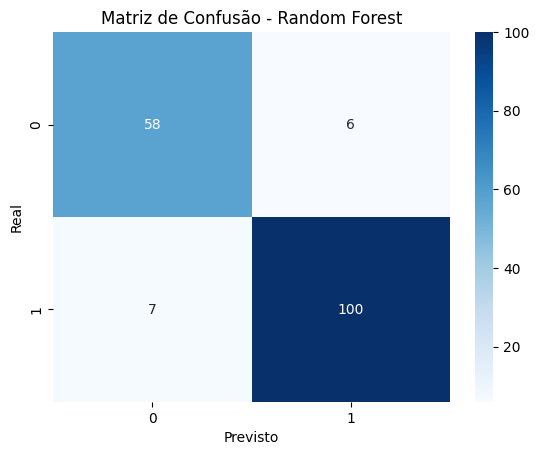

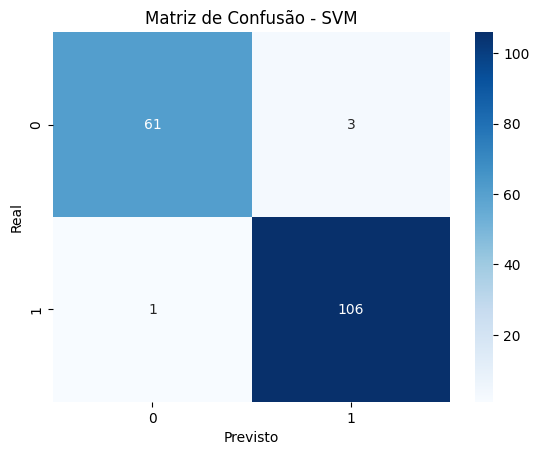

In [180]:
# Aplicar PCA mantendo 95% da variância
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA aplicado!")
print(f"Número de componentes principais escolhidos: {pca.n_components_}")

# Treinar novamente os modelos com os componentes do PCA
model_log_pca = LogisticRegression(max_iter=1000)
model_log_pca.fit(X_train_pca, y_train)

model_rf_pca = RandomForestClassifier(n_estimators=200, random_state=25)
model_rf_pca.fit(X_train_pca, y_train)

model_svc_pca = SVC(kernel='linear', probability=True, random_state=25)
model_svc_pca.fit(X_train_pca, y_train)

# Avaliar os modelos com PCA
preds_log_pca = model_log_pca.predict(X_test_pca)
preds_rf_pca = model_rf_pca.predict(X_test_pca)
preds_svm_pca = model_svc_pca.predict(X_test_pca)

print("Regressão Logística com PCA")
print(classification_report(y_test, preds_log_pca))

print("Random Forest com PCA")
print(classification_report(y_test, preds_rf_pca))

print("SVM com PCA")
print(classification_report(y_test, preds_svm_pca))

# Matriz de Confusão para o Regressão Logística
cm = confusion_matrix(y_test, preds_log_pca)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Matriz de Confusão para o Random Forest (melhor modelo geralmente)
cm = confusion_matrix(y_test, preds_rf_pca)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Matriz de Confusão para o SVM
cm = confusion_matrix(y_test, preds_svm_pca)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

ETAPA 8 - Reduzindo o número de features para 10

TOP 10 features mais importantes:
worst area              0.130000
mean concave points     0.115713
worst concave points    0.109767
worst radius            0.101256
worst perimeter         0.099208
mean concavity          0.061121
worst concavity         0.048947
area error              0.046732
mean radius             0.043683
mean area               0.040288
dtype: float64


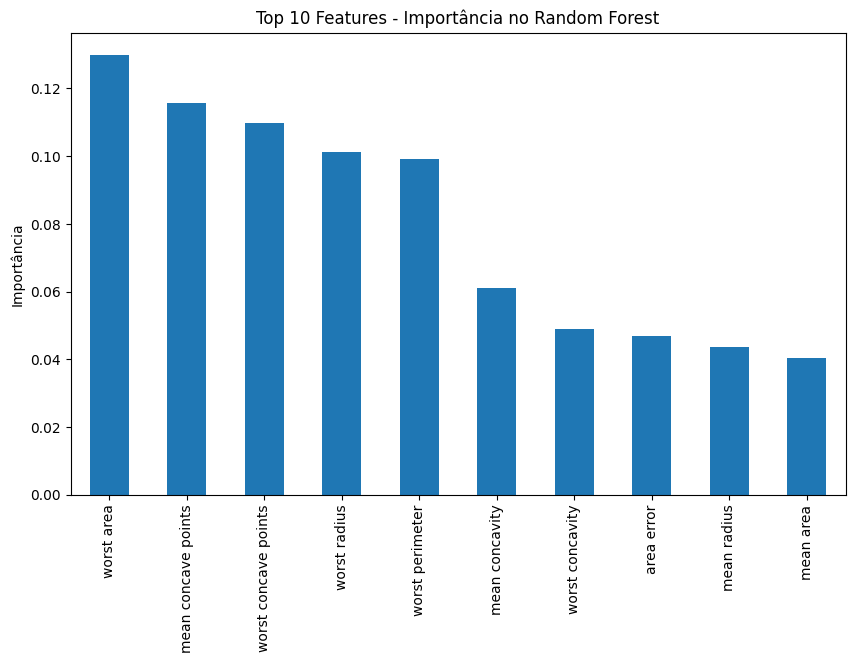

In [181]:
# FEATURE IMPORTANCE - RANDOM FOREST
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)

# Ordena da mais importante para a menos importante
feature_importances_ordenado = feature_importances.sort_values(ascending=False)

print("TOP 10 features mais importantes:")
print(feature_importances_ordenado.head(10))

plt.figure(figsize=(10,6))
feature_importances_ordenado.head(10).plot(kind='bar')
plt.title("Top 10 Features - Importância no Random Forest")
plt.ylabel("Importância")
plt.show()


In [182]:
# Selecionando as 10 features mais importantes Random Forest
top_features_rf = [
    'worst area',
    'mean concave points',
    'worst concave points',
    'worst radius',
    'worst perimeter',
    'mean concavity',
    'worst concavity',
    'area error',
    'mean radius',
    'mean area'
]

X_rf = X[top_features_rf]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y, test_size=0.30, random_state=25, stratify=y
)

scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf)
X_test_rf_scaled = scaler_rf.transform(X_test_rf)

model_rf_filt = RandomForestClassifier(n_estimators=200, random_state=25)
model_rf_filt.fit(X_train_rf_scaled, y_train_rf)

print("Random Forest (Top 10 do RF)")
print(classification_report(y_test_rf, model_rf_filt.predict(X_test_rf_scaled)))

Random Forest (Top 10 do RF)
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [183]:
# Selecionando as 10 features mais importantes SVM e Regressão Logística
top_features_corr = [
    'mean radius', 'mean perimeter', 'mean area', 'mean concavity',
    'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
    'worst concavity', 'worst concave points'
]

X_corr = X[top_features_corr]

X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    X_corr, y, test_size=0.30, random_state=25, stratify=y
)

scaler_corr = StandardScaler()
X_train_corr_scaled = scaler_corr.fit_transform(X_train_corr)
X_test_corr_scaled = scaler_corr.transform(X_test_corr)

# Regressão Logística (com features da correlação)
model_log_filt = LogisticRegression(max_iter=1000, random_state=25)
model_log_filt.fit(X_train_corr_scaled, y_train_corr)

# SVM (com features da correlação)
model_svc_filt = SVC(kernel='linear', probability=True, random_state=25)
model_svc_filt.fit(X_train_corr_scaled, y_train_corr)

print("\nRegressão Logística (Top 10 da Correlação)")
print(classification_report(y_test_corr, model_log_filt.predict(X_test_corr_scaled)))

print("\nSVC (Top 10 da Correlação)")
print(classification_report(y_test_corr, model_svc_filt.predict(X_test_corr_scaled)))



Regressão Logística (Top 10 da Correlação)
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        64
           1       0.97      0.93      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


SVC (Top 10 da Correlação)
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        64
           1       0.96      0.96      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



ETAPA 9 - Comparação dos Modelos com e sem Redução de Features (Curva ROC)

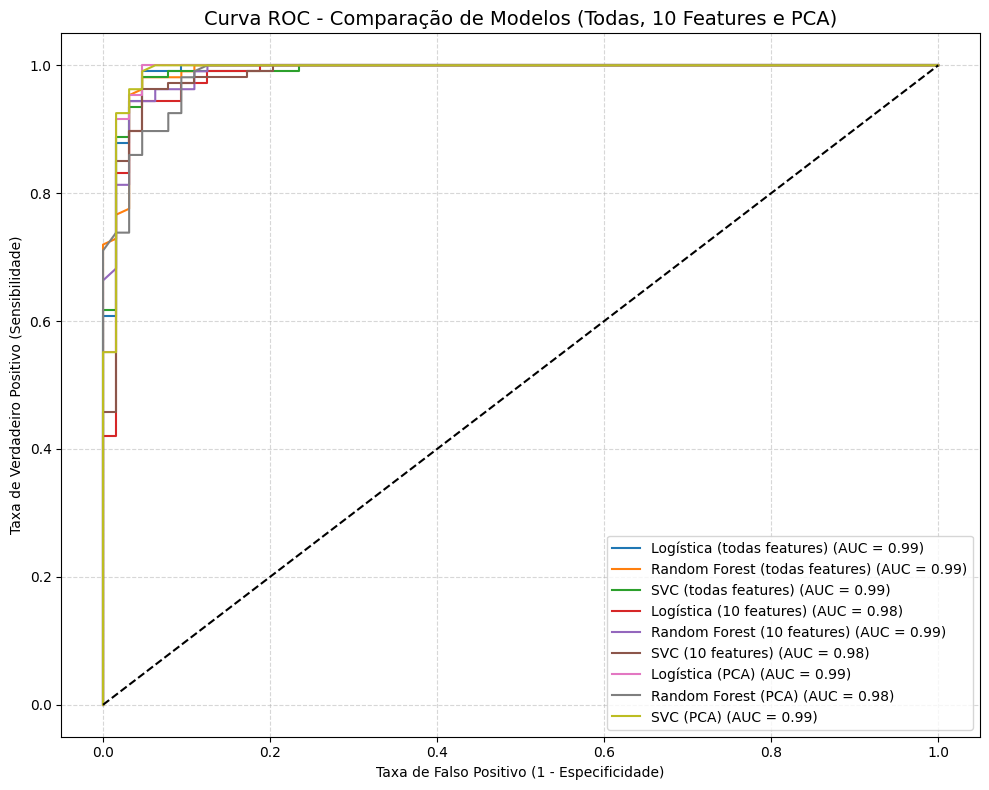

In [184]:
plt.figure(figsize=(10,8))

# Função para plotar ROC de qualquer modelo
def plot_roc(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:,1]  # pega a probabilidade de ser classe 1
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Modelos com todas as features
plot_roc(model_log, X_test_scaled, y_test, 'Logística (todas features)')
plot_roc(model_rf, X_test_scaled, y_test, 'Random Forest (todas features)')
plot_roc(model_svc, X_test_scaled, y_test, 'SVC (todas features)')

# Modelos com 10 features
plot_roc(model_log_filt, X_test_corr_scaled, y_test_corr, 'Logística (10 features)')
plot_roc(model_rf_filt, X_test_rf_scaled, y_test_rf, 'Random Forest (10 features)')
plot_roc(model_svc_filt, X_test_corr_scaled, y_test_corr, 'SVC (10 features)')

# Modelos com PCA
plot_roc(model_log_pca, X_test_pca, y_test, 'Logística (PCA)')
plot_roc(model_rf_pca, X_test_pca, y_test, 'Random Forest (PCA)')
plot_roc(model_svc_pca, X_test_pca, y_test, 'SVC (PCA)')

# Ajustes no gráfico
plt.plot([0,1],[0,1],'k--')  # linha diagonal de referência
plt.title('Curva ROC - Comparação de Modelos (Todas, 10 Features e PCA)', fontsize=14)
plt.xlabel('Taxa de Falso Positivo (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiro Positivo (Sensibilidade)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


ETAPA 10 - Comparação dos Modelos com e sem Redução de Features (Gráfico de Barras)

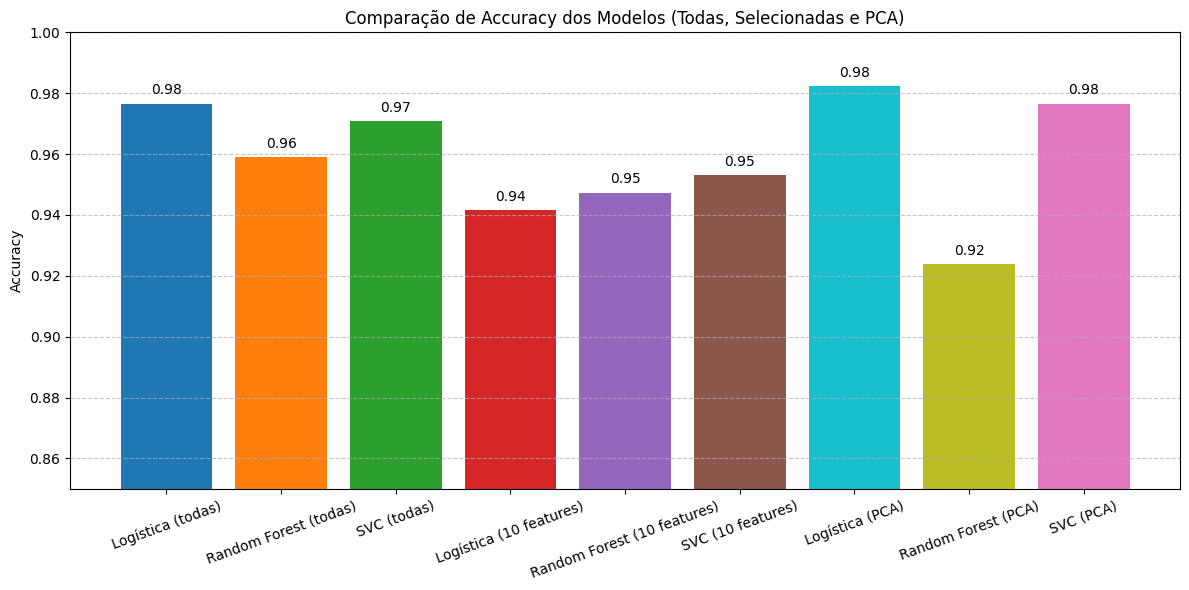

In [185]:
# Calcular accuracy de cada modelo
acc_log_all = accuracy_score(y_test, model_log.predict(X_test_scaled))
acc_rf_all = accuracy_score(y_test, model_rf.predict(X_test_scaled))
acc_svc_all = accuracy_score(y_test, model_svc.predict(X_test_scaled))

acc_log_10 = accuracy_score(y_test_corr, model_log_filt.predict(X_test_corr_scaled))
acc_rf_10 = accuracy_score(y_test_rf, model_rf_filt.predict(X_test_rf_scaled))
acc_svc_10 = accuracy_score(y_test_corr, model_svc_filt.predict(X_test_corr_scaled))

# Accuracy dos modelos com PCA
acc_log_pca = accuracy_score(y_test, model_log_pca.predict(X_test_pca))
acc_rf_pca = accuracy_score(y_test, model_rf_pca.predict(X_test_pca))
acc_svc_pca = accuracy_score(y_test, model_svc_pca.predict(X_test_pca))


# Organizar dados para o gráfico
modelos = [
    "Logística (todas)",
    "Random Forest (todas)",
    "SVC (todas)",
    "Logística (10 features)",
    "Random Forest (10 features)",
    "SVC (10 features)",
    "Logística (PCA)",
    "Random Forest (PCA)",
    "SVC (PCA)"
]

accuracies = [
    acc_log_all, acc_rf_all, acc_svc_all,
    acc_log_10, acc_rf_10, acc_svc_10,
    acc_log_pca, acc_rf_pca, acc_svc_pca
]

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c",
    "#d62728", "#9467bd", "#8c564b",
    "#17becf", "#bcbd22", "#e377c2"
]

# Criar gráfico de barras
plt.figure(figsize=(12,6))
bars = plt.bar(modelos, accuracies, color=colors)

# Adiciona os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.2f}", 
             ha='center', va='bottom', fontsize=10)

# Ajustes estéticos
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy")
plt.title("Comparação de Accuracy dos Modelos (Todas, Selecionadas e PCA)")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


ETAPA 11 - Comparação dos Modelos com e sem Redução de Features (Cross-Validation)

In [186]:
# Cross-validation (10 folds) para todos os modelos
scores_log = cross_val_score(model_log, X_train_scaled, y_train, cv=10)
scores_rf = cross_val_score(model_rf, X_train_scaled, y_train, cv=10)
scores_svc = cross_val_score(model_svc, X_train_scaled, y_train, cv=10)

scores_log_10 = cross_val_score(model_log_filt, X_train_corr_scaled, y_train_corr, cv=10)
scores_rf_10 = cross_val_score(model_rf_filt, X_train_rf_scaled, y_train_rf, cv=10)
scores_svc_10 = cross_val_score(model_svc_filt, X_train_corr_scaled, y_train_corr, cv=10)

scores_log_pca = cross_val_score(model_log_pca, X_train_pca, y_train, cv=10)
scores_rf_pca = cross_val_score(model_rf_pca, X_train_pca, y_train, cv=10)
scores_svc_pca = cross_val_score(model_svc_pca, X_train_pca, y_train, cv=10)


# Exibir resultados organizados
print("RESULTADOS CROSS-VALIDATION (10 FOLDS)")
print("-" * 50)
print(f"Logística (todas features):     {scores_log.mean():.3f} ± {scores_log.std():.3f}")
print(f"Random Forest (todas features): {scores_rf.mean():.3f} ± {scores_rf.std():.3f}")
print(f"SVC (todas features):           {scores_svc.mean():.3f} ± {scores_svc.std():.3f}")
print()
print(f"Logística (10 features):        {scores_log_10.mean():.3f} ± {scores_log_10.std():.3f}")
print(f"Random Forest (10 features):    {scores_rf_10.mean():.3f} ± {scores_rf_10.std():.3f}")
print(f"SVC (10 features):              {scores_svc_10.mean():.3f} ± {scores_svc_10.std():.3f}")
print()
print(f"Logística (PCA):                {scores_log_pca.mean():.3f} ± {scores_log_pca.std():.3f}")
print(f"Random Forest (PCA):            {scores_rf_pca.mean():.3f} ± {scores_rf_pca.std():.3f}")
print(f"SVC (PCA):                      {scores_svc_pca.mean():.3f} ± {scores_svc_pca.std():.3f}")

RESULTADOS CROSS-VALIDATION (10 FOLDS)
--------------------------------------------------
Logística (todas features):     0.980 ± 0.015
Random Forest (todas features): 0.960 ± 0.028
SVC (todas features):           0.970 ± 0.015

Logística (10 features):        0.955 ± 0.025
Random Forest (10 features):    0.947 ± 0.029
SVC (10 features):              0.950 ± 0.025

Logística (PCA):                0.980 ± 0.025
Random Forest (PCA):            0.932 ± 0.042
SVC (PCA):                      0.972 ± 0.021


ETAPA 12 - Gráfico de Barras com Erro Padrão dos Modelos

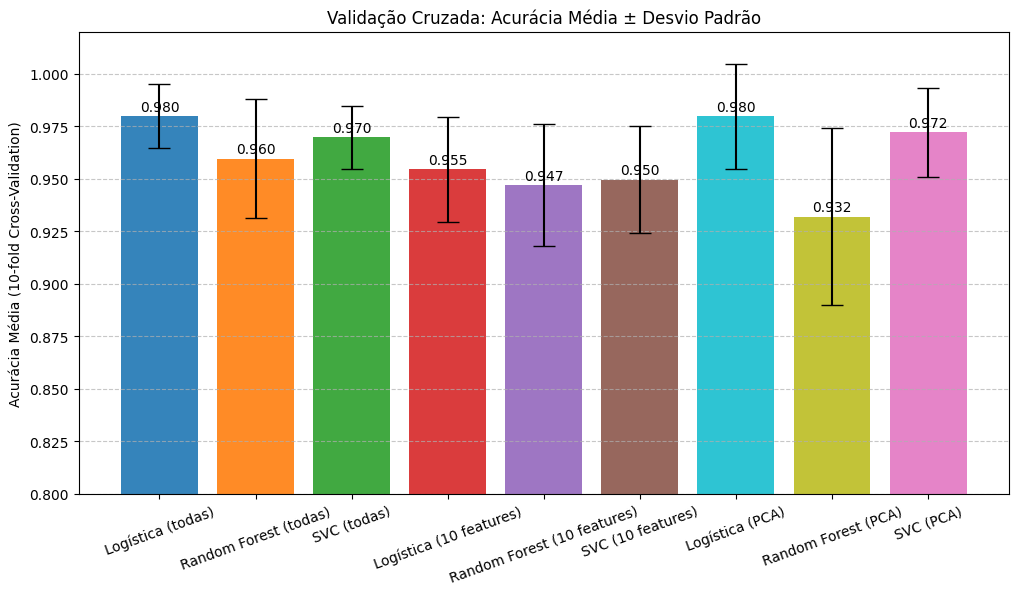

In [187]:


# Dados diretamente das variáveis de cross-validation
medias = [
    scores_log.mean(),
    scores_rf.mean(),
    scores_svc.mean(),
    scores_log_10.mean(),
    scores_rf_10.mean(),
    scores_svc_10.mean(),
    scores_log_pca.mean(),
    scores_rf_pca.mean(),
    scores_svc_pca.mean()
]

desvios = [
    scores_log.std(),
    scores_rf.std(),
    scores_svc.std(),
    scores_log_10.std(),
    scores_rf_10.std(),
    scores_svc_10.std(),
    scores_log_pca.std(),
    scores_rf_pca.std(),
    scores_svc_pca.std()
]

modelos = [
    "Logística (todas)",
    "Random Forest (todas)",
    "SVC (todas)",
    "Logística (10 features)",
    "Random Forest (10 features)",
    "SVC (10 features)",
    "Logística (PCA)",
    "Random Forest (PCA)",
    "SVC (PCA)"
]

cores = [
    "#1f77b4", "#ff7f0e", "#2ca02c",
    "#d62728", "#9467bd", "#8c564b",
    "#17becf", "#bcbd22", "#e377c2"
]

# Criar gráfico de barras com barras de erro
plt.figure(figsize=(12,6))
bars = plt.bar(modelos, medias, yerr=desvios, capsize=8, color=cores, alpha=0.9)

# Adicionar os valores numéricos acima das barras
for bar, media in zip(bars, medias):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 0.001, 
        f"{media:.3f}", 
        ha='center', va='bottom', fontsize=10
    )

# Ajustes do gráfico
plt.ylim(0.80, 1.02)
plt.ylabel("Acurácia Média (10-fold Cross-Validation)")
plt.title("Validação Cruzada: Acurácia Média ± Desvio Padrão")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)

plt.show()


Conclusão Final

A comparação dos modelos de classificação por meio da validação cruzada (10-fold) evidenciou que a Regressão Logística apresentou desempenho consistente e elevado em todas as estratégias avaliadas (todas as features, 10 mais correlacionadas e PCA), alcançando até 98% de acurácia média com baixo desvio padrão. Isso indica uma forte capacidade do modelo em generalizar bem para novos dados.

O Random Forest, embora também tenha apresentado bom desempenho geral, foi o modelo que mais variou entre as estratégias, especialmente quando submetido à redução de dimensionalidade via PCA, o que pode indicar sensibilidade à forma como as variáveis foram transformadas.

Já o SVC (Support Vector Classifier) manteve desempenho estável e competitivo nas três abordagens, com destaque para a versão com PCA, que alcançou 97,2% de acurácia média, superando ligeiramente o desempenho da versão com todas as variáveis.

De forma geral, os resultados demonstram que, embora a seleção de features e o uso do PCA possam oferecer vantagens específicas, modelos simples como a regressão logística continuam sendo altamente eficazes para o conjunto de dados avaliado, especialmente quando se busca estabilidade e previsibilidade nos resultados.